# Time Series Analysis of MER dataset

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('mer_imputed_merged_data.csv')
df.head(5)

,datetime,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex
0,2020-11-25 01:00:00,0,35.0,72.0,8.0,1.0,47.0,1.8,44.0,15.6,256.0,0.5,0,0,4
1,2020-11-25 02:00:00,0,43.0,73.0,7.0,1.0,43.0,1.3,47.0,15.0,296.0,0.7,0,0,4
2,2020-11-25 03:00:00,0,37.0,60.0,6.0,1.0,39.0,0.9,49.0,14.4,302.0,0.5,0,0,4
3,2020-11-25 04:00:00,0,34.0,51.0,4.0,1.0,37.0,0.4,51.0,13.6,320.0,0.7,0,0,4
4,2020-11-25 05:00:00,0,28.0,59.0,5.0,1.0,40.0,0.7,56.0,12.6,90.0,1.2,0,0,4


In [6]:
df.columns

Index(['datetime', 'direct_radiation (W/m²)', 'PM25_MER', 'PM10_MER',
       'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER', 'RH_MER', 'TMP_MER',
       'WDR_MER', 'WSP_MER', 'is_festival', 'is_weekend', 'AirQualityIndex'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26788 entries, 0 to 26787
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 26788 non-null  object 
 1   direct_radiation (W/m²)  26788 non-null  int64  
 2   PM25_MER                 26788 non-null  float64
 3   PM10_MER                 26788 non-null  float64
 4   SO2_MER                  26788 non-null  float64
 5   O3_MER                   26788 non-null  float64
 6   NO2_MER                  26788 non-null  float64
 7   CO_MER                   26788 non-null  float64
 8   RH_MER                   26788 non-null  float64
 9   TMP_MER                  26788 non-null  float64
 10  WDR_MER                  26788 non-null  float64
 11  WSP_MER                  26788 non-null  float64
 12  is_festival              26788 non-null  int64  
 13  is_weekend               26788 non-null  int64  
 14  AirQualityIndex       

No Missing Data: All columns are complete, which simplifies analysis.
Temporal Data: datetime column will need to be converted to a proper datetime object.
Pollutant Values: All pollutant-related columns (e.g., PM25_MER, SO2_MER) are numeric and ready for analysis.
Categorical Features: is_festival and is_weekend are ideal for comparative analysis.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
# Preprocess and Aggregate Data
# Set the datetime column as the index
df.reset_index(inplace=True)  # Ensure datetime is not already the index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Resample data for daily and monthly averages
daily_data = df.resample('D').mean()
monthly_data = df.resample('M').mean()

### 1.Overall Trends in AQI

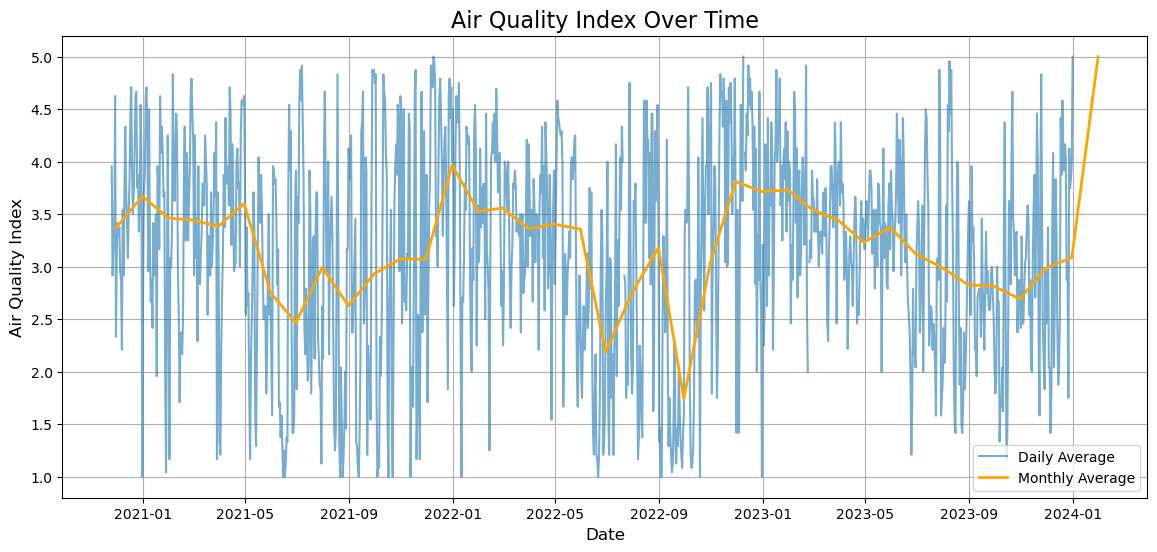

In [10]:
# Plot the Air Quality Index over time


plt.figure(figsize=(14, 6))
plt.plot(daily_data.index, daily_data['AirQualityIndex'], label='Daily Average', alpha=0.6)
plt.plot(monthly_data.index, monthly_data['AirQualityIndex'], label='Monthly Average', linewidth=2, color='orange')
plt.title('Air Quality Index Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Air Quality Index', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Weather conditions like low temperature, calm wind and high humidity in winter is resulting a high AQI. Human activities like increased heating and traffic combustion also add to it.

In Summer high temperature, stronger wind helps disperse pollutants and reduces their concentration at ground level.

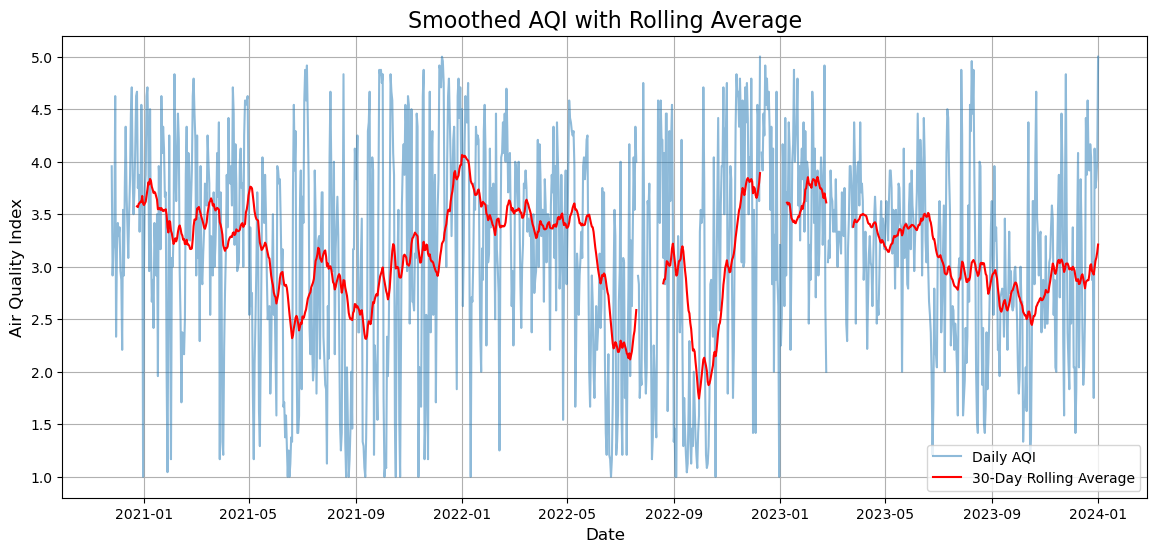

In [11]:
# b. 30 day Rolling Average for Smoothing


# Compute a rolling average (e.g., 30-day)
rolling_avg = daily_data['AirQualityIndex'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_data.index, daily_data['AirQualityIndex'], label='Daily AQI', alpha=0.5)
plt.plot(daily_data.index, rolling_avg, label='30-Day Rolling Average', color='red')
plt.title('Smoothed AQI with Rolling Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Air Quality Index', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


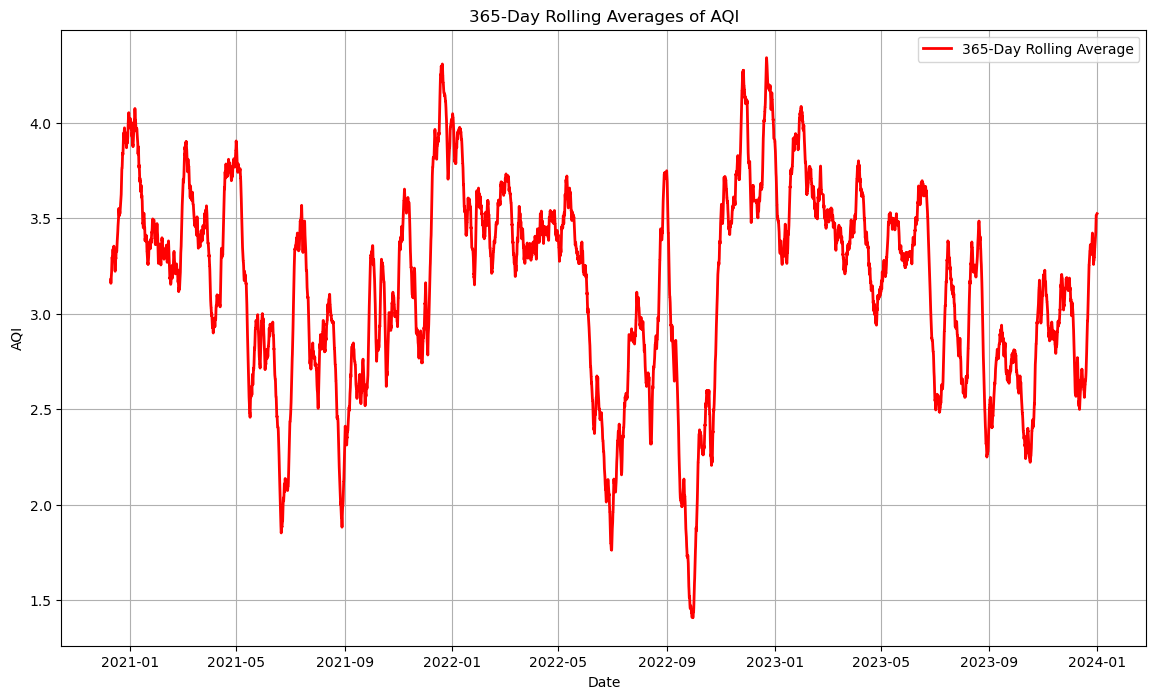

In [32]:
# 365 day rolling average 


# Calculate rolling averages
df['365_day_avg'] = df['AirQualityIndex'].rolling(window=365).mean()

# Plot the trends
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['365_day_avg'], label='365-Day Rolling Average', color='red', linewidth=2)
plt.title('365-Day Rolling Averages of AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


### 2.Decompose Time Series

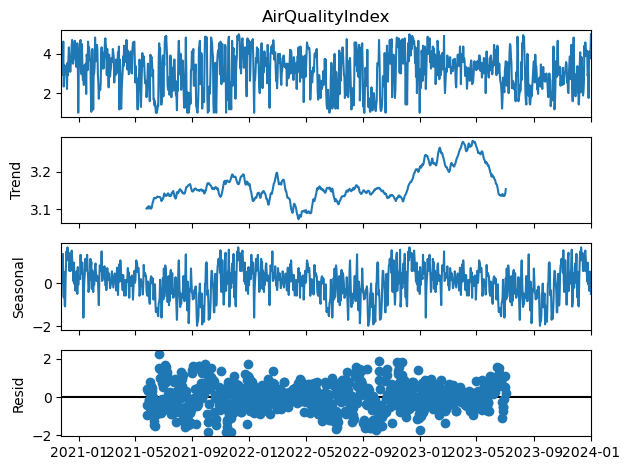

In [12]:
# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(daily_data['AirQualityIndex'].dropna(), model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

### 3.Analyze Seasonality

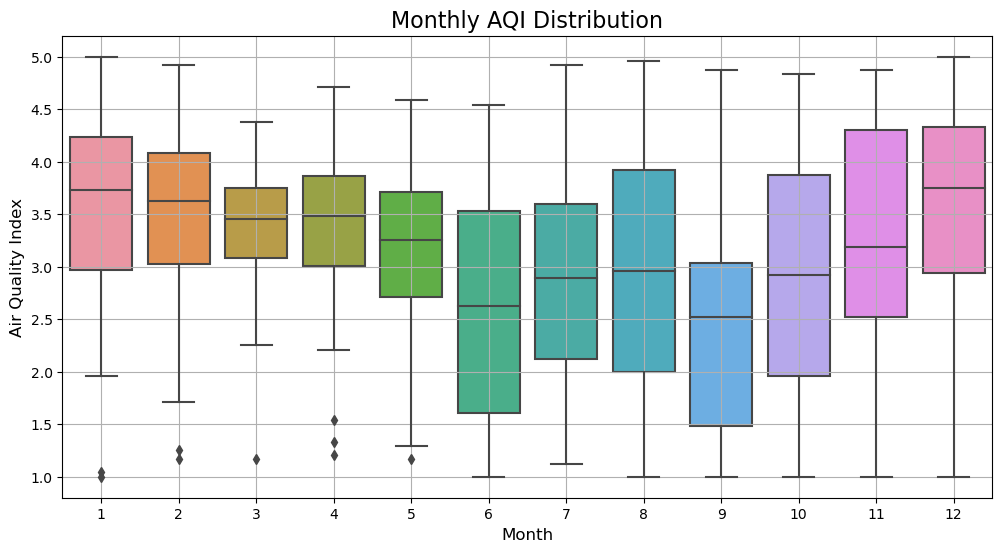

In [13]:
# a.Monthly Patterns


# Add a 'month' column
daily_data['month'] = daily_data.index.month

# Boxplot of AQI by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='AirQualityIndex', data=daily_data.reset_index())
plt.title('Monthly AQI Distribution', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Air Quality Index', fontsize=12)
plt.grid(True)
plt.show()

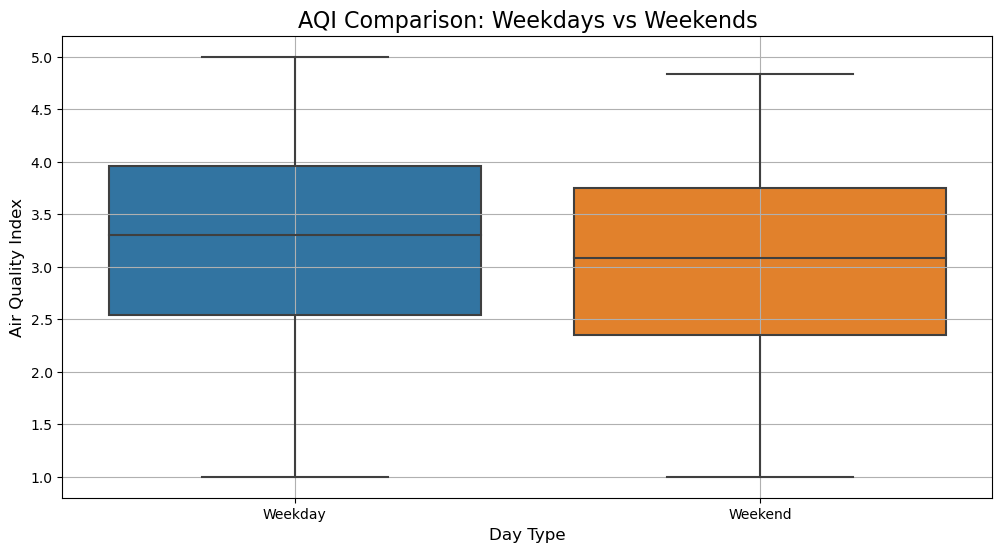

In [14]:
# b. Weekday/Weekend Analysis

# Add a 'weekday' column
daily_data['weekday'] = daily_data.index.weekday
daily_data['is_weekend'] = daily_data['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Compare AQI for weekends and weekdays
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_weekend', y='AirQualityIndex', data=daily_data.reset_index())
plt.title('AQI Comparison: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Air Quality Index', fontsize=12)
plt.grid(True)
plt.show()

### 4.Correlation and Anomaly Analysis

C:\Users\salee\AppData\Local\Temp\ipykernel_18636\2630562163.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = daily_data.corr()


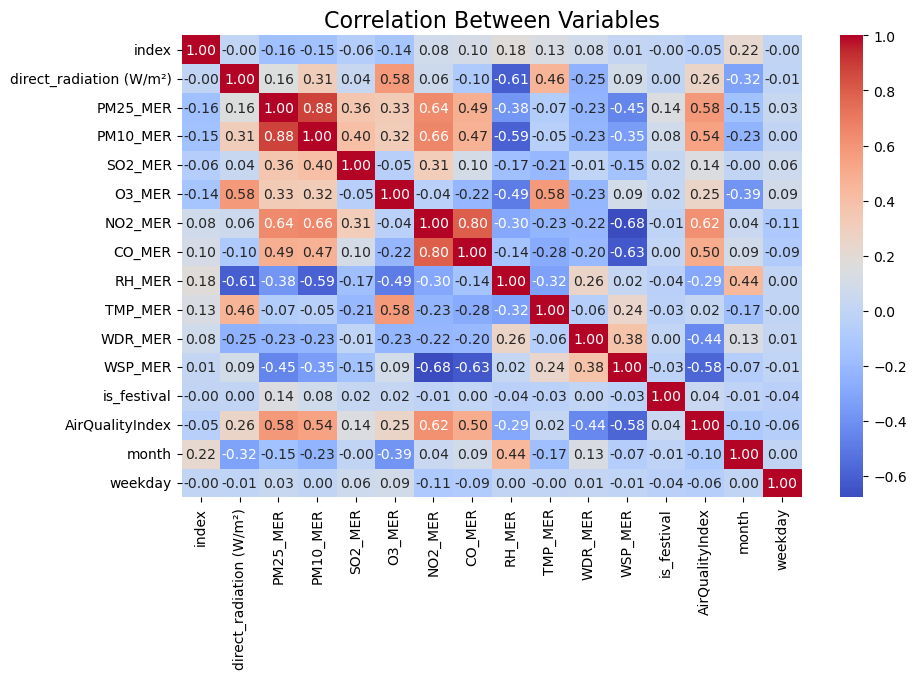

In [16]:
# a. Correlation Between Variables

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = daily_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables', fontsize=16)
plt.show()

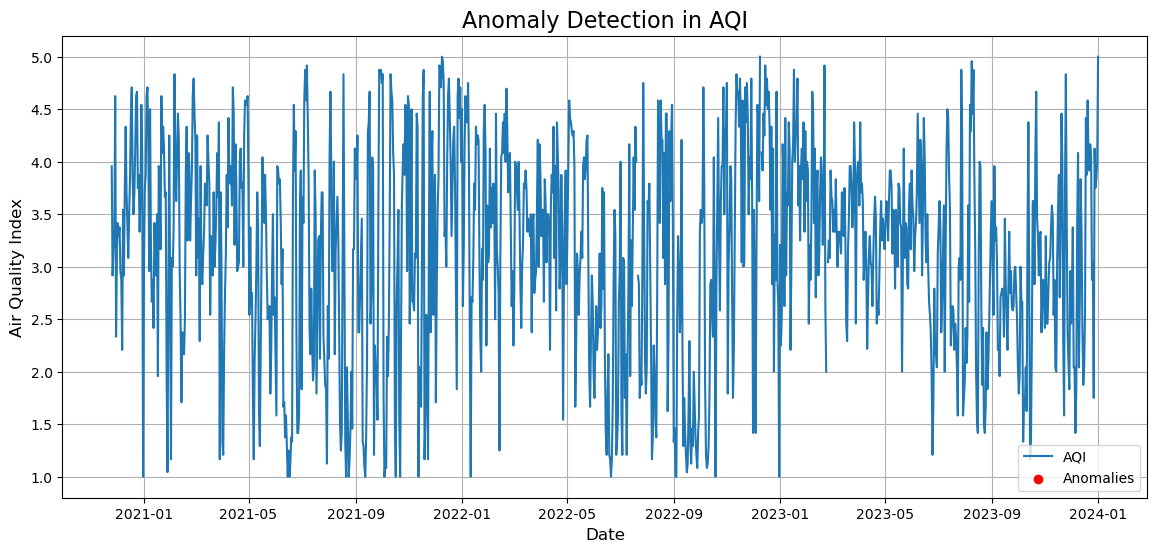

In [17]:
# b. Anomaly Detection Using Z-Score
# Identify unusual spikes or drops in AQI.

# Calculate z-scores for anomalies
daily_data['z_score'] = (daily_data['AirQualityIndex'] - daily_data['AirQualityIndex'].mean()) / daily_data['AirQualityIndex'].std()
anomalies = daily_data[daily_data['z_score'].abs() > 3]  # Outliers based on z-score

# Plot anomalies
plt.figure(figsize=(14, 6))
plt.plot(daily_data.index, daily_data['AirQualityIndex'], label='AQI')
plt.scatter(anomalies.index, anomalies['AirQualityIndex'], color='red', label='Anomalies')
plt.title('Anomaly Detection in AQI', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Air Quality Index', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### 5.Analyzing the Effect of Weather on AQI

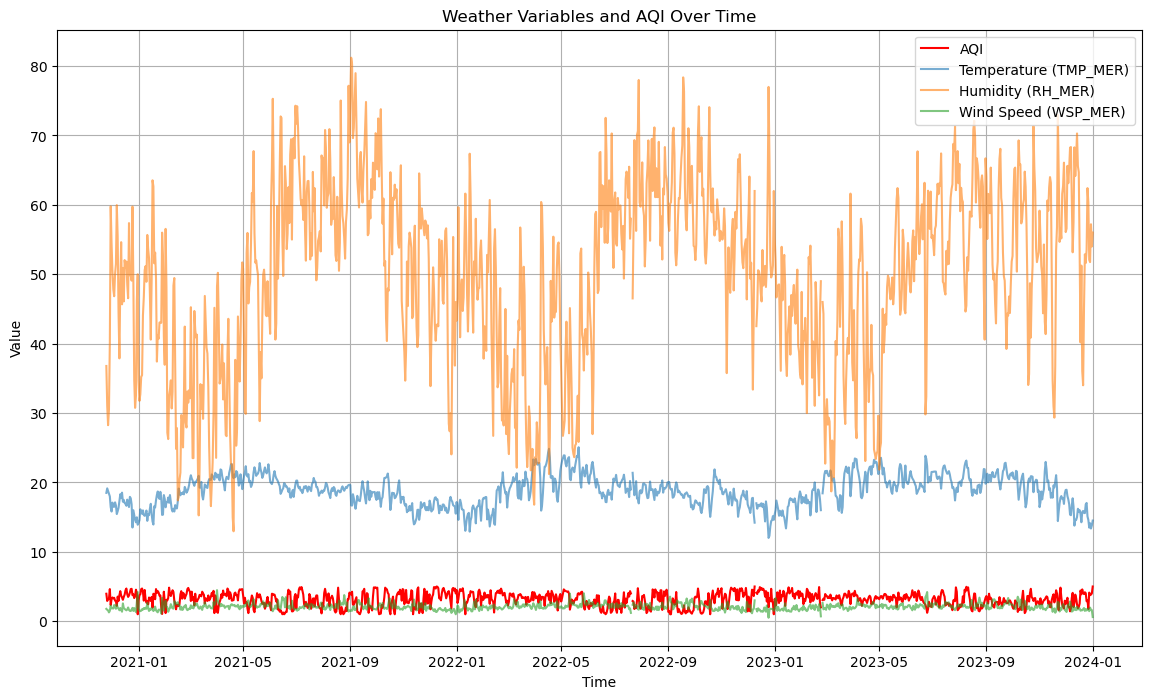

In [26]:
# Analyzing the Effect of Weather on AQI

plt.figure(figsize=(14, 8))
plt.plot(daily_data.index, daily_data['AirQualityIndex'], label='AQI', color='red')
plt.plot(daily_data.index, daily_data['TMP_MER'], label='Temperature (TMP_MER)', alpha=0.6)
plt.plot(daily_data.index, daily_data['RH_MER'], label='Humidity (RH_MER)', alpha=0.6)
plt.plot(daily_data.index, daily_data['WSP_MER'], label='Wind Speed (WSP_MER)', alpha=0.6)
plt.legend()
plt.title('Weather Variables and AQI Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

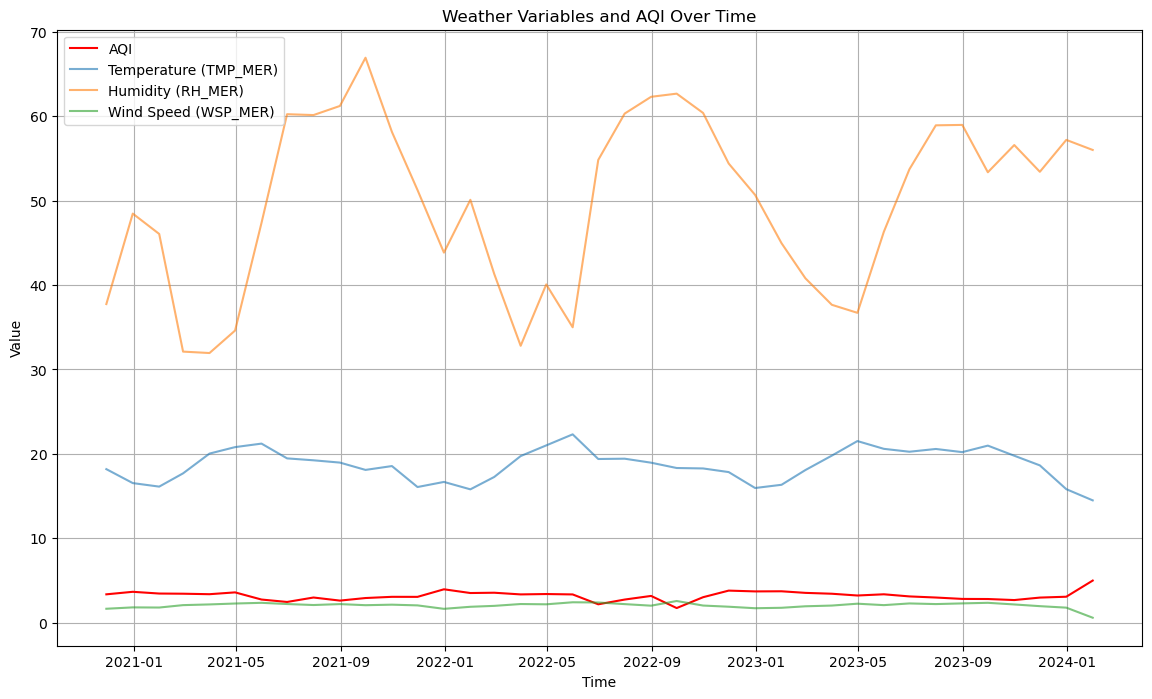

In [33]:
plt.figure(figsize=(14, 8))
plt.plot(monthly_data.index, monthly_data['AirQualityIndex'], label='AQI', color='red')
plt.plot(monthly_data.index, monthly_data['TMP_MER'], label='Temperature (TMP_MER)', alpha=0.6)
plt.plot(monthly_data.index, monthly_data['RH_MER'], label='Humidity (RH_MER)', alpha=0.6)
plt.plot(monthly_data.index, monthly_data['WSP_MER'], label='Wind Speed (WSP_MER)', alpha=0.6)
plt.legend()
plt.title('Weather Variables and AQI Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()